#MCV


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
DATA_DIR = "input_data"
today_str = datetime.now().strftime("%Y-%m-%d")
file_name = f"/kaggle/input/my-input-dataset/{today_str}_input_data.csv"
filter_df=pd.read_csv(file_name)

In [ ]:
filter_df.head(10)

,Date,Hour,Time_x,Purchase Bid (MW),Total Sell Bid (MW),Sell bid Solar (MW),Sell bid Non-Solar (MW),Sell bid Hydro (MW),MCV Total (MW),MCV Solar (MW),MCV Non-Solar (MW),MCV Hydro (MW),MCP (Rs/MWh)
0,2022-11-01,1,00:00 - 00:15,1367.2,334.5,0.0,334.5,0.0,253.0,0.0,253.0,0.0,3800.56
1,2022-11-01,2,00:15 - 00:30,1345.5,334.0,0.0,334.0,0.0,252.5,0.0,252.5,0.0,3800.56
2,2022-11-01,3,00:30 - 00:45,1355.1,334.0,0.0,334.0,0.0,252.6,0.0,252.6,0.0,3800.56
3,2022-11-01,4,00:45 - 01:00,1361.4,431.8,0.0,431.8,0.0,250.4,0.0,250.4,0.0,3800.56
4,2022-11-01,5,01:00 - 01:15,1311.6,430.7,0.0,430.7,0.0,249.2,0.0,249.2,0.0,3800.55
5,2022-11-01,6,01:15 - 01:30,1328.5,531.9,0.0,531.9,0.0,250.4,0.0,250.4,0.0,3800.56
6,2022-11-01,7,01:30 - 01:45,1334.9,633.4,0.0,633.4,0.0,251.9,0.0,251.9,0.0,3800.55
7,2022-11-01,8,01:45 - 02:00,1319.8,632.5,0.0,632.5,0.0,251.0,0.0,251.0,0.0,3800.56
8,2022-11-01,9,02:00 - 02:15,1299.0,732.2,0.0,732.2,0.0,250.7,0.0,250.7,0.0,3800.54
9,2022-11-01,10,02:15 - 02:30,1275.3,731.3,0.0,731.3,0.0,249.8,0.0,249.8,0.0,3800.54


In [ ]:
filter_df.shape

(94848, 13)

#MCV of next day using today

In [ ]:
filter_df.rename(columns={'MCP (Rs/MWh) ': 'MCP (Rs/MWh)'}, inplace=True)

In [ ]:
filter_df.head(10)

,Date,Hour,Time_x,Purchase Bid (MW),Total Sell Bid (MW),Sell bid Solar (MW),Sell bid Non-Solar (MW),Sell bid Hydro (MW),MCV Total (MW),MCV Solar (MW),MCV Non-Solar (MW),MCV Hydro (MW),MCP (Rs/MWh)
0,2022-11-01,1,00:00 - 00:15,1367.2,334.5,0.0,334.5,0.0,253.0,0.0,253.0,0.0,3800.56
1,2022-11-01,2,00:15 - 00:30,1345.5,334.0,0.0,334.0,0.0,252.5,0.0,252.5,0.0,3800.56
2,2022-11-01,3,00:30 - 00:45,1355.1,334.0,0.0,334.0,0.0,252.6,0.0,252.6,0.0,3800.56
3,2022-11-01,4,00:45 - 01:00,1361.4,431.8,0.0,431.8,0.0,250.4,0.0,250.4,0.0,3800.56
4,2022-11-01,5,01:00 - 01:15,1311.6,430.7,0.0,430.7,0.0,249.2,0.0,249.2,0.0,3800.55
5,2022-11-01,6,01:15 - 01:30,1328.5,531.9,0.0,531.9,0.0,250.4,0.0,250.4,0.0,3800.56
6,2022-11-01,7,01:30 - 01:45,1334.9,633.4,0.0,633.4,0.0,251.9,0.0,251.9,0.0,3800.55
7,2022-11-01,8,01:45 - 02:00,1319.8,632.5,0.0,632.5,0.0,251.0,0.0,251.0,0.0,3800.56
8,2022-11-01,9,02:00 - 02:15,1299.0,732.2,0.0,732.2,0.0,250.7,0.0,250.7,0.0,3800.54
9,2022-11-01,10,02:15 - 02:30,1275.3,731.3,0.0,731.3,0.0,249.8,0.0,249.8,0.0,3800.54


In [ ]:
lagged_data_for_model = filter_df.copy()

In [ ]:
print(lagged_data_for_model.columns.tolist())

['Date', 'Hour', 'Time_x', 'Purchase Bid (MW)', 'Total Sell Bid (MW)', 'Sell bid Solar (MW)', 'Sell bid Non-Solar (MW)', 'Sell bid Hydro (MW)', 'MCV Total (MW)', 'MCV Solar (MW)', 'MCV Non-Solar (MW)', 'MCV Hydro (MW)', 'MCP (Rs/MWh)']


In [ ]:
# Drop rows with NaN values due to lagging
lagged_data_for_model.dropna(inplace=True)

# Check the dataframe to see the new lagged columns
lagged_data_for_model.head()

,Date,Hour,Time_x,Purchase Bid (MW),Total Sell Bid (MW),Sell bid Solar (MW),Sell bid Non-Solar (MW),Sell bid Hydro (MW),MCV Total (MW),MCV Solar (MW),MCV Non-Solar (MW),MCV Hydro (MW),MCP (Rs/MWh)
0,2022-11-01,1,00:00 - 00:15,1367.2,334.5,0.0,334.5,0.0,253.0,0.0,253.0,0.0,3800.56
1,2022-11-01,2,00:15 - 00:30,1345.5,334.0,0.0,334.0,0.0,252.5,0.0,252.5,0.0,3800.56
2,2022-11-01,3,00:30 - 00:45,1355.1,334.0,0.0,334.0,0.0,252.6,0.0,252.6,0.0,3800.56
3,2022-11-01,4,00:45 - 01:00,1361.4,431.8,0.0,431.8,0.0,250.4,0.0,250.4,0.0,3800.56
4,2022-11-01,5,01:00 - 01:15,1311.6,430.7,0.0,430.7,0.0,249.2,0.0,249.2,0.0,3800.55


In [ ]:
lagged_data_for_model['Next day MCP'] = lagged_data_for_model['MCP (Rs/MWh)'].shift(-96)
lagged_data_for_model['Next Day MCV'] = lagged_data_for_model['MCV Total (MW)'].shift(-96)
lagged_data_for_model['prediction Date'] = lagged_data_for_model['Date'].shift(-96)

# Drop the last 192 rows since they will have NaN values after shifting
lagged_data_for_model = lagged_data_for_model.dropna().reset_index(drop=True)


In [ ]:
lagged_data_for_model.head(10)

,Date,Hour,Time_x,Purchase Bid (MW),Total Sell Bid (MW),Sell bid Solar (MW),Sell bid Non-Solar (MW),Sell bid Hydro (MW),MCV Total (MW),MCV Solar (MW),MCV Non-Solar (MW),MCV Hydro (MW),MCP (Rs/MWh),Next day MCP,Next Day MCV,prediction Date
0,2022-11-01,1,00:00 - 00:15,1367.2,334.5,0.0,334.5,0.0,253.0,0.0,253.0,0.0,3800.56,4500.15,266.8,2022-11-02
1,2022-11-01,2,00:15 - 00:30,1345.5,334.0,0.0,334.0,0.0,252.5,0.0,252.5,0.0,3800.56,4500.11,267.8,2022-11-02
2,2022-11-01,3,00:30 - 00:45,1355.1,334.0,0.0,334.0,0.0,252.6,0.0,252.6,0.0,3800.56,4500.07,268.1,2022-11-02
3,2022-11-01,4,00:45 - 01:00,1361.4,431.8,0.0,431.8,0.0,250.4,0.0,250.4,0.0,3800.56,4500.42,268.4,2022-11-02
4,2022-11-01,5,01:00 - 01:15,1311.6,430.7,0.0,430.7,0.0,249.2,0.0,249.2,0.0,3800.55,4324.66,262.1,2022-11-02
5,2022-11-01,6,01:15 - 01:30,1328.5,531.9,0.0,531.9,0.0,250.4,0.0,250.4,0.0,3800.56,4500.09,269.9,2022-11-02
6,2022-11-01,7,01:30 - 01:45,1334.9,633.4,0.0,633.4,0.0,251.9,0.0,251.9,0.0,3800.55,4500.22,271.7,2022-11-02
7,2022-11-01,8,01:45 - 02:00,1319.8,632.5,0.0,632.5,0.0,251.0,0.0,251.0,0.0,3800.56,4500.14,272.7,2022-11-02
8,2022-11-01,9,02:00 - 02:15,1299.0,732.2,0.0,732.2,0.0,250.7,0.0,250.7,0.0,3800.54,4500.13,274.5,2022-11-02
9,2022-11-01,10,02:15 - 02:30,1275.3,731.3,0.0,731.3,0.0,249.8,0.0,249.8,0.0,3800.54,4499.27,272.9,2022-11-02


In [ ]:
# prompt: drop date and time_x column

# Assuming 'Date' and 'time_x' columns exist
lagged_data_for_model = lagged_data_for_model.drop(['Date', 'Time_x'], axis=1)

In [ ]:
lagged_data_for_model.head(10)

,Hour,Purchase Bid (MW),Total Sell Bid (MW),Sell bid Solar (MW),Sell bid Non-Solar (MW),Sell bid Hydro (MW),MCV Total (MW),MCV Solar (MW),MCV Non-Solar (MW),MCV Hydro (MW),MCP (Rs/MWh),Next day MCP,Next Day MCV,prediction Date
0,1,1367.2,334.5,0.0,334.5,0.0,253.0,0.0,253.0,0.0,3800.56,4500.15,266.8,2022-11-02
1,2,1345.5,334.0,0.0,334.0,0.0,252.5,0.0,252.5,0.0,3800.56,4500.11,267.8,2022-11-02
2,3,1355.1,334.0,0.0,334.0,0.0,252.6,0.0,252.6,0.0,3800.56,4500.07,268.1,2022-11-02
3,4,1361.4,431.8,0.0,431.8,0.0,250.4,0.0,250.4,0.0,3800.56,4500.42,268.4,2022-11-02
4,5,1311.6,430.7,0.0,430.7,0.0,249.2,0.0,249.2,0.0,3800.55,4324.66,262.1,2022-11-02
5,6,1328.5,531.9,0.0,531.9,0.0,250.4,0.0,250.4,0.0,3800.56,4500.09,269.9,2022-11-02
6,7,1334.9,633.4,0.0,633.4,0.0,251.9,0.0,251.9,0.0,3800.55,4500.22,271.7,2022-11-02
7,8,1319.8,632.5,0.0,632.5,0.0,251.0,0.0,251.0,0.0,3800.56,4500.14,272.7,2022-11-02
8,9,1299.0,732.2,0.0,732.2,0.0,250.7,0.0,250.7,0.0,3800.54,4500.13,274.5,2022-11-02
9,10,1275.3,731.3,0.0,731.3,0.0,249.8,0.0,249.8,0.0,3800.54,4499.27,272.9,2022-11-02


In [ ]:
# prompt: separeate Year Month Day column from Date column of lagged_data_for_model

# Assuming 'Date' column exists in lagged_data_for_model
lagged_data_for_model['prediction Date'] = pd.to_datetime(lagged_data_for_model['prediction Date'], format="%Y-%m-%d")

lagged_data_for_model['Year'] = lagged_data_for_model['prediction Date'].dt.year
lagged_data_for_model['Month'] = lagged_data_for_model['prediction Date'].dt.month
lagged_data_for_model['Day'] = lagged_data_for_model['prediction Date'].dt.day

In [ ]:
lagged_data_for_model['prediction Date'] = pd.to_datetime(lagged_data_for_model[['Year', 'Month', 'Day']])
# Add a new column for day category based on the day of the week (0=Monday, 6=Sunday)
lagged_data_for_model['Day_Category'] = lagged_data_for_model['prediction Date'].dt.weekday

In [ ]:
lagged_data_for_model.head(5)

,Hour,Purchase Bid (MW),Total Sell Bid (MW),Sell bid Solar (MW),Sell bid Non-Solar (MW),Sell bid Hydro (MW),MCV Total (MW),MCV Solar (MW),MCV Non-Solar (MW),MCV Hydro (MW),MCP (Rs/MWh),Next day MCP,Next Day MCV,prediction Date,Year,Month,Day,Day_Category
0,1,1367.2,334.5,0.0,334.5,0.0,253.0,0.0,253.0,0.0,3800.56,4500.15,266.8,2022-11-02,2022,11,2,2
1,2,1345.5,334.0,0.0,334.0,0.0,252.5,0.0,252.5,0.0,3800.56,4500.11,267.8,2022-11-02,2022,11,2,2
2,3,1355.1,334.0,0.0,334.0,0.0,252.6,0.0,252.6,0.0,3800.56,4500.07,268.1,2022-11-02,2022,11,2,2
3,4,1361.4,431.8,0.0,431.8,0.0,250.4,0.0,250.4,0.0,3800.56,4500.42,268.4,2022-11-02,2022,11,2,2
4,5,1311.6,430.7,0.0,430.7,0.0,249.2,0.0,249.2,0.0,3800.55,4324.66,262.1,2022-11-02,2022,11,2,2


In [ ]:
lagged_data_for_model['Avg_Week_Hourly_MCP'] = (
    lagged_data_for_model.groupby('Hour')['MCP (Rs/MWh)']
    .apply(lambda x: x.shift().rolling(window=672, min_periods=1).mean())
    .reset_index(level=0, drop=True)  # This aligns the index with the original DataFrame
)

# Step 3: Fill any NaN values in the first week with the average MCV from the available data
lagged_data_for_model['Avg_Week_Hourly_MCP'].fillna(lagged_data_for_model['MCP (Rs/MWh)'].expanding().mean(), inplace=True)

/tmp/ipython-input-641130857.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lagged_data_for_model['Avg_Week_Hourly_MCP'].fillna(lagged_data_for_model['MCP (Rs/MWh)'].expanding().mean(), inplace=True)


In [ ]:
lagged_data_for_model['Avg_Week_Hourly_MCV'] = (
    lagged_data_for_model.groupby('Hour')['MCV Total (MW)']
    .apply(lambda x: x.shift().rolling(window=672, min_periods=1).mean())
    .reset_index(level=0, drop=True)  # This aligns the index with the original DataFrame
)

# Step 3: Fill any NaN values in the first week with the average MCV from the available data
lagged_data_for_model['Avg_Week_Hourly_MCV'].fillna(lagged_data_for_model['MCV Total (MW)'].expanding().mean(), inplace=True)

/tmp/ipython-input-3452429903.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lagged_data_for_model['Avg_Week_Hourly_MCV'].fillna(lagged_data_for_model['MCV Total (MW)'].expanding().mean(), inplace=True)


In [ ]:
#move everything to the front
cols = lagged_data_for_model.columns.tolist()
cols = ['Year', 'Month', 'Day', 'Hour'] + [col for col in cols if col not in ['Year', 'Month', 'Day', 'Hour']]
lagged_data_for_model = lagged_data_for_model[cols]


In [ ]:
cols = lagged_data_for_model.columns.tolist()
cols.insert(0, cols.pop(cols.index('Day_Category')))
lagged_data_for_model = lagged_data_for_model[cols]

In [ ]:
lagged_data_for_model.head(10)

,Day_Category,Year,Month,Day,Hour,Purchase Bid (MW),Total Sell Bid (MW),Sell bid Solar (MW),Sell bid Non-Solar (MW),Sell bid Hydro (MW),MCV Total (MW),MCV Solar (MW),MCV Non-Solar (MW),MCV Hydro (MW),MCP (Rs/MWh),Next day MCP,Next Day MCV,prediction Date,Avg_Week_Hourly_MCP,Avg_Week_Hourly_MCV
0,2,2022,11,2,1,1367.2,334.5,0.0,334.5,0.0,253.0,0.0,253.0,0.0,3800.56,4500.15,266.8,2022-11-02,3800.560000,253.000000
1,2,2022,11,2,2,1345.5,334.0,0.0,334.0,0.0,252.5,0.0,252.5,0.0,3800.56,4500.11,267.8,2022-11-02,3800.560000,252.750000
2,2,2022,11,2,3,1355.1,334.0,0.0,334.0,0.0,252.6,0.0,252.6,0.0,3800.56,4500.07,268.1,2022-11-02,3800.560000,252.700000
3,2,2022,11,2,4,1361.4,431.8,0.0,431.8,0.0,250.4,0.0,250.4,0.0,3800.56,4500.42,268.4,2022-11-02,3800.560000,252.125000
4,2,2022,11,2,5,1311.6,430.7,0.0,430.7,0.0,249.2,0.0,249.2,0.0,3800.55,4324.66,262.1,2022-11-02,3800.558000,251.540000
5,2,2022,11,2,6,1328.5,531.9,0.0,531.9,0.0,250.4,0.0,250.4,0.0,3800.56,4500.09,269.9,2022-11-02,3800.558333,251.350000
6,2,2022,11,2,7,1334.9,633.4,0.0,633.4,0.0,251.9,0.0,251.9,0.0,3800.55,4500.22,271.7,2022-11-02,3800.557143,251.428571
7,2,2022,11,2,8,1319.8,632.5,0.0,632.5,0.0,251.0,0.0,251.0,0.0,3800.56,4500.14,272.7,2022-11-02,3800.557500,251.375000
8,2,2022,11,2,9,1299.0,732.2,0.0,732.2,0.0,250.7,0.0,250.7,0.0,3800.54,4500.13,274.5,2022-11-02,3800.555556,251.300000
9,2,2022,11,2,10,1275.3,731.3,0.0,731.3,0.0,249.8,0.0,249.8,0.0,3800.54,4499.27,272.9,2022-11-02,3800.554000,251.150000


In [ ]:
# prompt: set prediction Date as index

# Set 'prediction Date' as the index
lagged_data_for_model = lagged_data_for_model.set_index('prediction Date')
lagged_data_for_model.head(10)

,Day_Category,Year,Month,Day,Hour,Purchase Bid (MW),Total Sell Bid (MW),Sell bid Solar (MW),Sell bid Non-Solar (MW),Sell bid Hydro (MW),MCV Total (MW),MCV Solar (MW),MCV Non-Solar (MW),MCV Hydro (MW),MCP (Rs/MWh),Next day MCP,Next Day MCV,Avg_Week_Hourly_MCP,Avg_Week_Hourly_MCV
prediction Date,,,,,,,,,,,,,,,,,,,
2022-11-02,2,2022,11,2,1,1367.2,334.5,0.0,334.5,0.0,253.0,0.0,253.0,0.0,3800.56,4500.15,266.8,3800.560000,253.000000
2022-11-02,2,2022,11,2,2,1345.5,334.0,0.0,334.0,0.0,252.5,0.0,252.5,0.0,3800.56,4500.11,267.8,3800.560000,252.750000
2022-11-02,2,2022,11,2,3,1355.1,334.0,0.0,334.0,0.0,252.6,0.0,252.6,0.0,3800.56,4500.07,268.1,3800.560000,252.700000
2022-11-02,2,2022,11,2,4,1361.4,431.8,0.0,431.8,0.0,250.4,0.0,250.4,0.0,3800.56,4500.42,268.4,3800.560000,252.125000
2022-11-02,2,2022,11,2,5,1311.6,430.7,0.0,430.7,0.0,249.2,0.0,249.2,0.0,3800.55,4324.66,262.1,3800.558000,251.540000
2022-11-02,2,2022,11,2,6,1328.5,531.9,0.0,531.9,0.0,250.4,0.0,250.4,0.0,3800.56,4500.09,269.9,3800.558333,251.350000
2022-11-02,2,2022,11,2,7,1334.9,633.4,0.0,633.4,0.0,251.9,0.0,251.9,0.0,3800.55,4500.22,271.7,3800.557143,251.428571
2022-11-02,2,2022,11,2,8,1319.8,632.5,0.0,632.5,0.0,251.0,0.0,251.0,0.0,3800.56,4500.14,272.7,3800.557500,251.375000
2022-11-02,2,2022,11,2,9,1299.0,732.2,0.0,732.2,0.0,250.7,0.0,250.7,0.0,3800.54,4500.13,274.5,3800.555556,251.300000


In [ ]:
# #columns_to_keep = ['Hour', 'Purchase Bid (MW)', 'Temp_GJ', 'Hum_GJ', 'Rain_GJ', 'Temp_MH', 'Hum_MH', 'Rain_MH', 'Temp_MP', 'Hum_MP', 'Rain_MP', 'Temp_GOA', 'Hum_GOA', 'Rain_GOA', 'Temp_RJ', 'Hum_RJ', 'Rain_RJ', 'Temp_HR', 'Hum_HR', 'Rain_HR', 'Temp_PB', 'Hum_PB', 'Rain_PB', 'Temp_DL', 'Hum_DL', 'Rain_DL', 'Temp_UP', 'Hum_UP', 'Rain_UP', 'Temp_UK', 'Hum_UK', 'Rain_UK', 'Temp_HP', 'Hum_HP', 'Rain_HP', 'Temp_TG', 'Hum_TG', 'Rain_TG', 'Temp_AP', 'Hum_AP', 'Rain_AP', 'Temp_KA', 'Hum_KA', 'Rain_KA', 'Temp_TN', 'Hum_TN', 'Rain_TN', 'Temp_KL', 'Hum_KL', 'Rain_KL', 'Year', 'Month', 'Day', 'GEB_ISGS_lag_1_day', 'GEB_GDAM_lag_1_day', 'GEB_GNA_lag_1_day', 'GEB_REMC_lag_1_day', 'MSEB_ISGS_lag_1_day', 'MSEB_GDAM_lag_1_day', 'MSEB_GNA_lag_1_day', 'MSEB_REMC_lag_1_day', 'MP_ISGS_lag_1_day', 'MP_GDAM_lag_1_day', 'MP_GNA_lag_1_day', 'MP_REMC_lag_1_day', 'GOA_ISGS_lag_1_day', 'GOA_GDAM_lag_1_day', 'GOA_GNA_lag_1_day', 'GOA_REMC_lag_1_day', 'RAJASTHAN_STATE_ISGS_lag_1_day', 'RAJASTHAN_STATE_GDAM_lag_1_day', 'RAJASTHAN_STATE_GNA_lag_1_day', 'RAJASTHAN_STATE_REMC_lag_1_day', 'HARYANA_STATE_ISGS_lag_1_day', 'HARYANA_STATE_GDAM_lag_1_day', 'HARYANA_STATE_GNA_lag_1_day', 'HARYANA_STATE_REMC_lag_1_day', 'PUNJAB_STATE_ISGS_lag_1_day', 'PUNJAB_STATE_GDAM_lag_1_day', 'PUNJAB_STATE_GNA_lag_1_day', 'PUNJAB_STATE_REMC_lag_1_day', 'DELHI_UT_ISGS_lag_1_day', 'DELHI_UT_GDAM_lag_1_day', 'DELHI_UT_GNA_lag_1_day', 'DELHI_UT_REMC_lag_1_day', 'UTTARPRADESH_STATE_ISGS_lag_1_day', 'UTTARPRADESH_STATE_GDAM_lag_1_day', 'UTTARPRADESH_STATE_GNA_lag_1_day', 'UTTARPRADESH_STATE_REMC_lag_1_day', 'UTTARAKHAND_STATE_ISGS_lag_1_day', 'UTTARAKHAND_STATE_GDAM_lag_1_day', 'UTTARAKHAND_STATE_GNA_lag_1_day', 'UTTARAKHAND_STATE_REMC_lag_1_day', 'HIMACHAL_STATE_ISGS_lag_1_day', 'HIMACHAL_STATE_GDAM_lag_1_day', 'HIMACHAL_STATE_GNA_lag_1_day', 'HIMACHAL_STATE_REMC_lag_1_day', 'TL_ISGS_lag_1_day', 'TL_GDAM_lag_1_day', 'TL_GNA_lag_1_day', 'TL_REMC_lag_1_day', 'AP_ISGS_lag_1_day', 'AP_GDAM_lag_1_day', 'AP_GNA_lag_1_day', 'AP_REMC_lag_1_day', 'KA_ISGS_lag_1_day', 'KA_GDAM_lag_1_day', 'KA_GNA_lag_1_day', 'KA_REMC_lag_1_day', 'TN_ISGS_lag_1_day', 'TN_GDAM_lag_1_day', 'TN_GNA_lag_1_day', 'TN_REMC_lag_1_day', 'KL_ISGS_lag_1_day', 'KL_GDAM_lag_1_day', 'KL_GNA_lag_1_day', 'KL_REMC_lag_1_day', 'Day_Category', 'Previous Day MCP', 'Previous Day MCV', 'Previous Day Purchase Bid (MW)', 'Previous Day Total Sell Bid (MW)', 'Avg_Week_Hourly_MCP']
# columns_to_keep = [col for col in lagged_data_for_model if col not in [ 'Sell bid Solar (MW)', 'Sell bid Non-Solar (MW)', 'Sell bid Hydro (MW)', 'MCV Solar (MW)', 'MCV Non-Solar (MW)', 'MCV Hydro (MW)',]]
# # Print the list of column names
# print(columns_to_keep)

In [ ]:
# lagged_data=lagged_data_for_model[columns_to_keep]

In [ ]:
# lagged_data.head(10) #Purchase Bid (MW)	Total Sell Bid (MW)	MCV Total (MW)	MCP (Rs/MWh) (1st august) and target is 3 august Next 2 Days MCP	Next 2 Days MCV

In [ ]:
last_week_data = lagged_data_for_model.tail(672)

In [ ]:
last_week_data.tail(10) #Purchase Bid (MW)	Total Sell Bid (MW)	MCV Total (MW) MCP (Rs/MWh all are of 29th july

,Day_Category,Year,Month,Day,Hour,Purchase Bid (MW),Total Sell Bid (MW),Sell bid Solar (MW),Sell bid Non-Solar (MW),Sell bid Hydro (MW),MCV Total (MW),MCV Solar (MW),MCV Non-Solar (MW),MCV Hydro (MW),MCP (Rs/MWh),Next day MCP,Next Day MCV,Avg_Week_Hourly_MCP,Avg_Week_Hourly_MCV
prediction Date,,,,,,,,,,,,,,,,,,,
2025-07-15,1,2025,7,15,87,4560.4,998.9,0.0,847.3,151.6,998.90,0.0,847.30,151.60,10000.0,10000.0,906.60,7009.282113,466.962143
2025-07-15,1,2025,7,15,88,4608.5,994.1,0.0,842.5,151.6,994.10,0.0,842.50,151.60,10000.0,10000.0,903.30,6987.131310,465.283080
2025-07-15,1,2025,7,15,89,4876.9,985.0,0.0,833.4,151.6,985.00,0.0,833.40,151.60,10000.0,10000.0,894.00,6655.956071,437.945417
2025-07-15,1,2025,7,15,90,4855.9,981.2,0.0,829.6,151.6,981.20,0.0,829.60,151.60,10000.0,10000.0,888.10,6669.720982,440.412351
2025-07-15,1,2025,7,15,91,4971.1,975.8,0.0,824.2,151.6,975.80,0.0,824.20,151.60,10000.0,10000.0,873.30,6642.852366,444.926161
2025-07-15,1,2025,7,15,92,4769.5,972.6,0.0,821.0,151.6,972.60,0.0,821.00,151.60,10000.0,10000.0,855.70,6649.792292,447.729211
2025-07-15,1,2025,7,15,93,4686.0,935.9,0.0,814.3,121.6,935.88,0.0,814.29,121.59,10000.0,10000.0,803.09,6566.816622,456.212530
2025-07-15,1,2025,7,15,94,4724.8,930.7,0.0,809.1,121.6,930.69,0.0,809.09,121.60,10000.0,10000.0,787.10,6557.250491,460.334970
2025-07-15,1,2025,7,15,95,4767.0,928.2,0.0,806.6,121.6,928.20,0.0,806.60,121.60,10000.0,10000.0,788.80,6516.256354,462.231057


In [ ]:
lagged_data = lagged_data_for_model.iloc[:-672]

In [ ]:
lagged_data.tail(10) #23 july Purchase Bid (MW)	Total Sell Bid (MW)	MCV Total (MW)	MCP (Rs/MWh)

,Day_Category,Year,Month,Day,Hour,Purchase Bid (MW),Total Sell Bid (MW),Sell bid Solar (MW),Sell bid Non-Solar (MW),Sell bid Hydro (MW),MCV Total (MW),MCV Solar (MW),MCV Non-Solar (MW),MCV Hydro (MW),MCP (Rs/MWh),Next day MCP,Next Day MCV,Avg_Week_Hourly_MCP,Avg_Week_Hourly_MCV
prediction Date,,,,,,,,,,,,,,,,,,,
2025-07-08,1,2025,7,8,87,3034.7,963.0,0.0,799.4,163.6,963.00,0.0,799.4,163.60,10000.00,6500.44,605.1,7014.491830,458.099345
2025-07-08,1,2025,7,8,88,3029.4,967.8,0.0,804.2,163.6,967.80,0.0,804.2,163.60,10000.00,6500.45,610.2,6992.340893,456.339301
2025-07-08,1,2025,7,8,89,3555.0,967.0,0.0,803.4,163.6,967.00,0.0,803.4,163.60,10000.00,6500.35,610.8,6661.166339,429.115149
2025-07-08,1,2025,7,8,90,3542.8,968.5,0.0,804.9,163.6,968.50,0.0,804.9,163.60,10000.00,6500.33,616.3,6674.930818,431.512232
2025-07-08,1,2025,7,8,91,3530.0,975.4,0.0,811.8,163.6,975.39,0.0,811.8,163.59,10000.00,6500.28,618.8,6648.062574,435.993929
2025-07-08,1,2025,7,8,92,3519.2,1077.4,0.0,913.8,163.6,1077.39,0.0,913.8,163.59,10000.00,6499.42,650.1,6655.245536,438.603304
2025-07-08,1,2025,7,8,93,3325.1,1170.1,0.0,1006.5,163.6,1170.10,0.0,1006.5,163.60,10000.00,6000.19,684.5,6573.514152,446.922440
2025-07-08,1,2025,7,8,94,3289.5,1171.5,0.0,1007.9,163.6,1171.50,0.0,1007.9,163.60,10000.00,6000.12,684.3,6564.732455,451.373646
2025-07-08,1,2025,7,8,95,3238.5,1274.0,0.0,1110.4,163.6,1164.60,0.0,1042.0,122.60,7499.03,6000.09,683.5,6537.043363,453.019509


In [ ]:
# features = lagged_data.drop(['Next day MCP', 'Next Day MCV'], axis=1)
# target = lagged_data['Next day MCP']

In [ ]:
lagged_data.head(10)

,Day_Category,Year,Month,Day,Hour,Purchase Bid (MW),Total Sell Bid (MW),Sell bid Solar (MW),Sell bid Non-Solar (MW),Sell bid Hydro (MW),MCV Total (MW),MCV Solar (MW),MCV Non-Solar (MW),MCV Hydro (MW),MCP (Rs/MWh),Next day MCP,Next Day MCV,Avg_Week_Hourly_MCP,Avg_Week_Hourly_MCV
prediction Date,,,,,,,,,,,,,,,,,,,
2022-11-02,2,2022,11,2,1,1367.2,334.5,0.0,334.5,0.0,253.0,0.0,253.0,0.0,3800.56,4500.15,266.8,3800.560000,253.000000
2022-11-02,2,2022,11,2,2,1345.5,334.0,0.0,334.0,0.0,252.5,0.0,252.5,0.0,3800.56,4500.11,267.8,3800.560000,252.750000
2022-11-02,2,2022,11,2,3,1355.1,334.0,0.0,334.0,0.0,252.6,0.0,252.6,0.0,3800.56,4500.07,268.1,3800.560000,252.700000
2022-11-02,2,2022,11,2,4,1361.4,431.8,0.0,431.8,0.0,250.4,0.0,250.4,0.0,3800.56,4500.42,268.4,3800.560000,252.125000
2022-11-02,2,2022,11,2,5,1311.6,430.7,0.0,430.7,0.0,249.2,0.0,249.2,0.0,3800.55,4324.66,262.1,3800.558000,251.540000
2022-11-02,2,2022,11,2,6,1328.5,531.9,0.0,531.9,0.0,250.4,0.0,250.4,0.0,3800.56,4500.09,269.9,3800.558333,251.350000
2022-11-02,2,2022,11,2,7,1334.9,633.4,0.0,633.4,0.0,251.9,0.0,251.9,0.0,3800.55,4500.22,271.7,3800.557143,251.428571
2022-11-02,2,2022,11,2,8,1319.8,632.5,0.0,632.5,0.0,251.0,0.0,251.0,0.0,3800.56,4500.14,272.7,3800.557500,251.375000
2022-11-02,2,2022,11,2,9,1299.0,732.2,0.0,732.2,0.0,250.7,0.0,250.7,0.0,3800.54,4500.13,274.5,3800.555556,251.300000


In [ ]:
final_lag_df=lagged_data

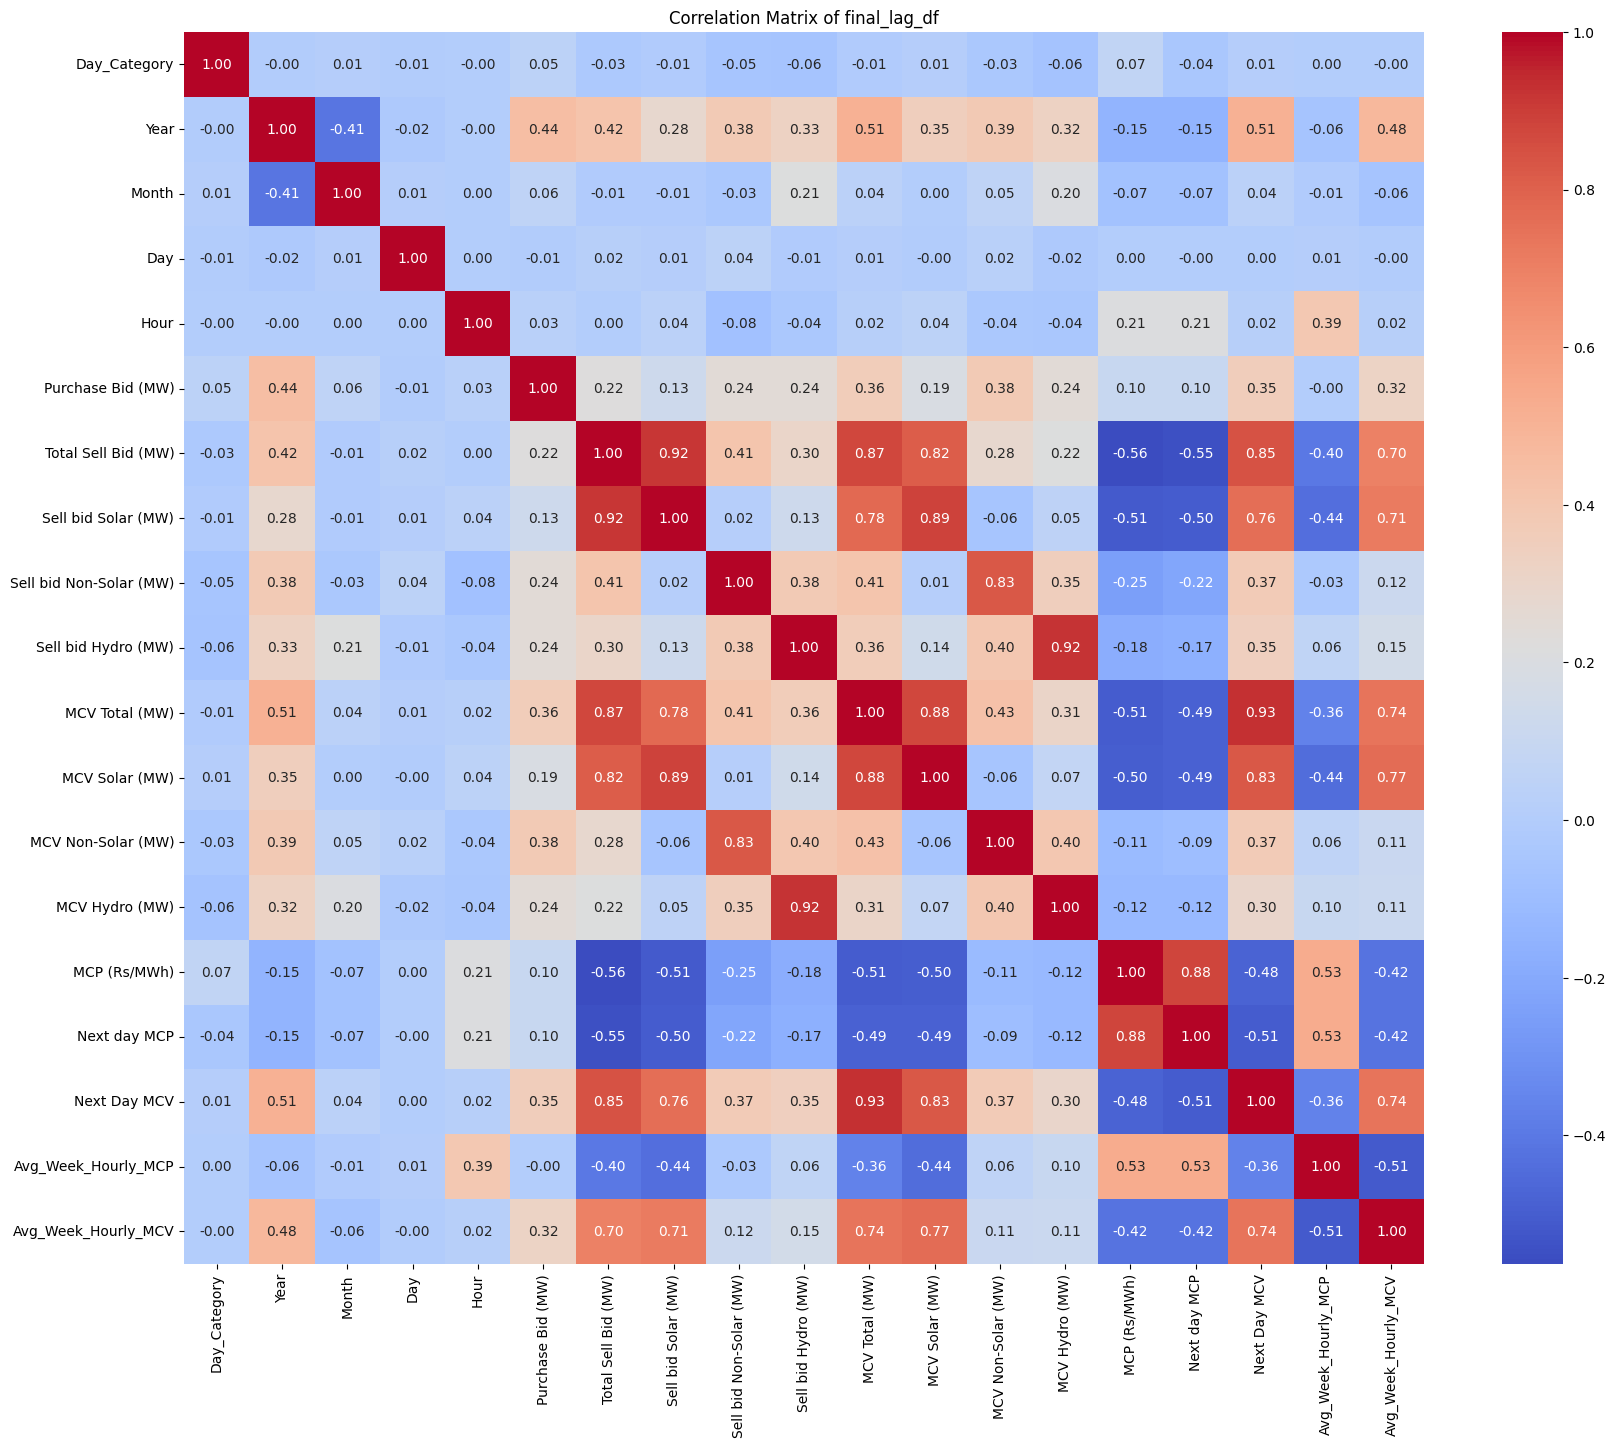

In [ ]:
# prompt: check correlation matrix of final_lag_df

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_lag_df' is already defined in your code as 'lagged_data'
final_lag_df = lagged_data

# Calculate the correlation matrix
correlation_matrix = final_lag_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of final_lag_df")
plt.show()

In [ ]:
final_lag_df.tail(10)

,Day_Category,Year,Month,Day,Hour,Purchase Bid (MW),Total Sell Bid (MW),Sell bid Solar (MW),Sell bid Non-Solar (MW),Sell bid Hydro (MW),MCV Total (MW),MCV Solar (MW),MCV Non-Solar (MW),MCV Hydro (MW),MCP (Rs/MWh),Next day MCP,Next Day MCV,Avg_Week_Hourly_MCP,Avg_Week_Hourly_MCV
prediction Date,,,,,,,,,,,,,,,,,,,
2025-07-08,1,2025,7,8,87,3034.7,963.0,0.0,799.4,163.6,963.00,0.0,799.4,163.60,10000.00,6500.44,605.1,7014.491830,458.099345
2025-07-08,1,2025,7,8,88,3029.4,967.8,0.0,804.2,163.6,967.80,0.0,804.2,163.60,10000.00,6500.45,610.2,6992.340893,456.339301
2025-07-08,1,2025,7,8,89,3555.0,967.0,0.0,803.4,163.6,967.00,0.0,803.4,163.60,10000.00,6500.35,610.8,6661.166339,429.115149
2025-07-08,1,2025,7,8,90,3542.8,968.5,0.0,804.9,163.6,968.50,0.0,804.9,163.60,10000.00,6500.33,616.3,6674.930818,431.512232
2025-07-08,1,2025,7,8,91,3530.0,975.4,0.0,811.8,163.6,975.39,0.0,811.8,163.59,10000.00,6500.28,618.8,6648.062574,435.993929
2025-07-08,1,2025,7,8,92,3519.2,1077.4,0.0,913.8,163.6,1077.39,0.0,913.8,163.59,10000.00,6499.42,650.1,6655.245536,438.603304
2025-07-08,1,2025,7,8,93,3325.1,1170.1,0.0,1006.5,163.6,1170.10,0.0,1006.5,163.60,10000.00,6000.19,684.5,6573.514152,446.922440
2025-07-08,1,2025,7,8,94,3289.5,1171.5,0.0,1007.9,163.6,1171.50,0.0,1007.9,163.60,10000.00,6000.12,684.3,6564.732455,451.373646
2025-07-08,1,2025,7,8,95,3238.5,1274.0,0.0,1110.4,163.6,1164.60,0.0,1042.0,122.60,7499.03,6000.09,683.5,6537.043363,453.019509


In [ ]:
# prompt: drop Avg_Week_Hourly_MCP from final_lag_df

final_lag_df = final_lag_df.drop('Avg_Week_Hourly_MCP', axis=1)

In [ ]:
features=final_lag_df.drop(['Next day MCP','Next Day MCV'], axis=1)
targets=final_lag_df['Next Day MCV']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming 'df' is your DataFrame containing the merged data

# Define features and target variable
X_data = features  # Use your features from the DataFrame
Y_data = targets    # Use your target from the DataFrame

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, train_size=0.8, random_state=42)
#X_train = X_data.iloc[:-192]
#y_train = Y_data.iloc[:-192]
#X_test = X_data.iloc[-192:-96]
#y_test = Y_data.iloc[-192:-96]

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a parameter grid to search for the best hyperparameters
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300]
}

# Create the grid search object
grid_search = GridSearchCV(HistGradientBoostingRegressor(), param_grid, cv=5)

# Fit the model on the scaled training data
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best model to predict and evaluate
model = grid_search.best_estimator_
y_pred1 = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred1)
print(f"R2 Score: {r2}")
r2 = int(r2*100)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print(f"RMSE: {rmse}")


Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'max_iter': 300}
R2 Score: 0.9570895406383724
RMSE: 111.86911309872755


In [ ]:
import pickle
# Save the model to a file
with open(f'{today_str}_next_day_mcv_{r2}.pkl', 'wb') as f:
    pickle.dump(model, f)


Training R2 Score: 0.9709883886475229
Testing R2 Score: 0.9570895406383724


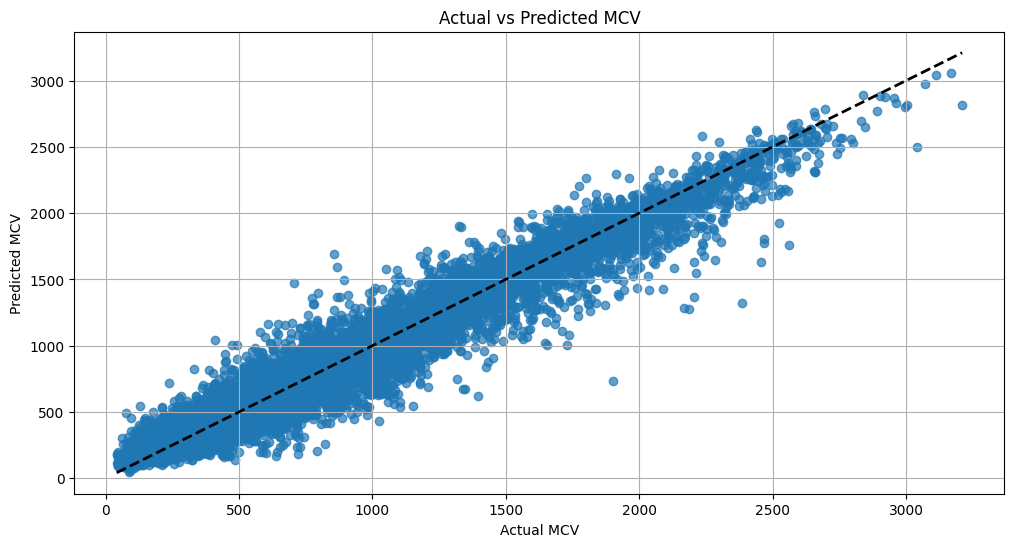

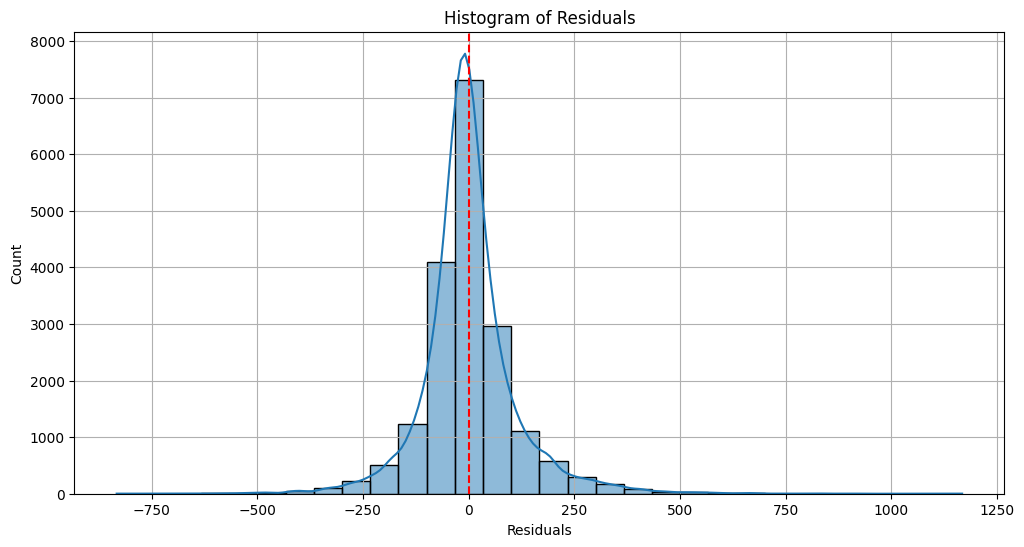

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

# Visualization of actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred1, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for perfect prediction
plt.xlabel('Actual MCV')
plt.ylabel('Predicted MCV')
plt.title('Actual vs Predicted MCV')
plt.grid(True)
plt.show()

# Histogram of residuals
residuals = y_test - y_pred1
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.axvline(0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [ ]:
real_df = last_week_data.head(96) #23th
real_df

,Day_Category,Year,Month,Day,Hour,Purchase Bid (MW),Total Sell Bid (MW),Sell bid Solar (MW),Sell bid Non-Solar (MW),Sell bid Hydro (MW),MCV Total (MW),MCV Solar (MW),MCV Non-Solar (MW),MCV Hydro (MW),MCP (Rs/MWh),Next day MCP,Next Day MCV,Avg_Week_Hourly_MCP,Avg_Week_Hourly_MCV
prediction Date,,,,,,,,,,,,,,,,,,,
2025-07-09,2,2025,7,9,1,2377.2,1154.3,21.0,949.7,183.6,757.00,21.00,552.40,183.60,4499.17,9448.25,856.90,5947.565967,476.171503
2025-07-09,2,2025,7,9,2,2424.6,1157.1,20.0,953.5,183.6,752.60,20.00,549.00,183.60,4499.15,9412.67,855.00,5887.776890,474.292753
2025-07-09,2,2025,7,9,3,2399.2,1157.4,19.0,954.8,183.6,1040.20,19.00,850.56,170.64,4099.59,9439.29,853.90,5780.187158,477.603601
2025-07-09,2,2025,7,9,4,2455.2,1153.7,17.0,953.1,183.6,1058.90,17.00,858.30,183.60,4012.32,9261.17,851.70,5710.361220,479.187798
2025-07-09,2,2025,7,9,5,2339.5,1155.7,17.0,955.1,183.6,1060.90,17.00,860.30,183.60,4012.38,4999.08,812.00,5535.560804,496.936949
2025-07-09,2,2025,7,9,6,2490.4,1156.1,18.0,954.5,183.6,1062.30,18.00,860.70,183.60,4012.39,4440.67,805.90,5456.133185,499.664226
2025-07-09,2,2025,7,9,7,2565.5,1153.6,19.0,951.0,183.6,1058.80,19.00,856.20,183.60,4012.09,4300.63,804.20,5315.335967,508.824182
2025-07-09,2,2025,7,9,8,2671.0,1158.9,19.0,956.3,183.6,1063.10,19.00,860.50,183.60,4012.08,4300.23,801.20,5241.526473,510.016622
2025-07-09,2,2025,7,9,9,2775.9,1142.4,19.0,939.8,183.6,1046.60,19.00,844.00,183.60,4012.43,4000.46,791.69,4950.854509,527.461414


In [ ]:
input_data = real_df.drop(['Next day MCP','Next Day MCV','Avg_Week_Hourly_MCP'], axis=1)

# Make predictions for the last 96 blocks
predictions = model.predict(input_data)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({'Predicted MCV (MW)': predictions})

predictions_df

,Predicted MCV (MW)
0,746.119634
1,746.119634
2,801.266514
3,827.128293
4,832.592618
5,836.639851
6,843.513088
7,865.726135
8,905.914574
9,905.914574


In [ ]:
next_day_actual =last_week_data.head(96)['Next Day MCV']
next_day_actual

,Next Day MCV
prediction Date,
2025-07-09,856.90
2025-07-09,855.00
2025-07-09,853.90
2025-07-09,851.70
2025-07-09,812.00
2025-07-09,805.90
2025-07-09,804.20
2025-07-09,801.20
2025-07-09,791.69


In [ ]:
combined_df = pd.concat([next_day_actual.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)
combined_df

,Next Day MCV,Predicted MCV (MW)
0,856.90,746.119634
1,855.00,746.119634
2,853.90,801.266514
3,851.70,827.128293
4,812.00,832.592618
5,805.90,836.639851
6,804.20,843.513088
7,801.20,865.726135
8,791.69,905.914574
9,781.09,905.914574


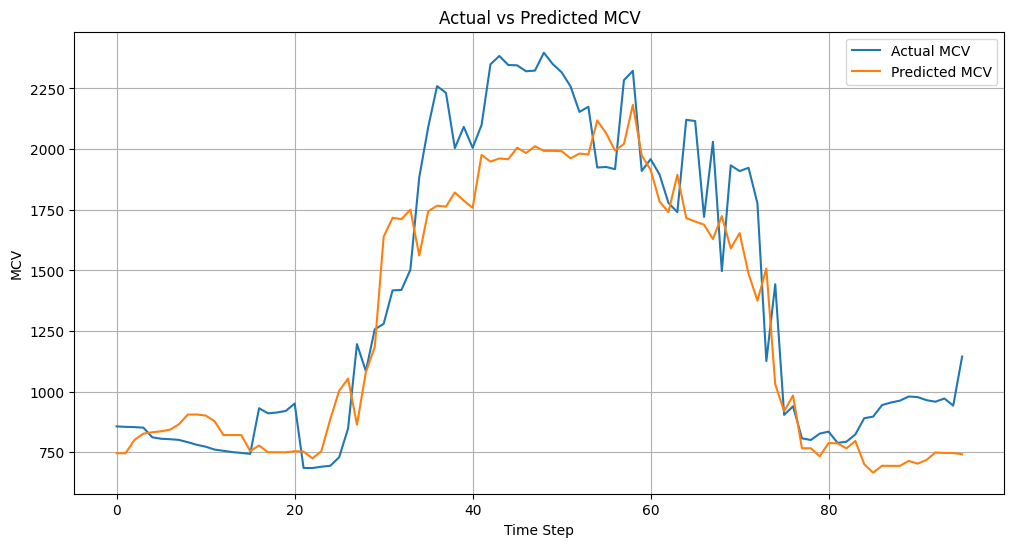

In [ ]:
# prompt: i want graph mcp vs predicted mcp

import matplotlib.pyplot as plt

# Assuming 'combined_df' is your DataFrame with 'MCP (Rs/MWh)' and 'Predicted MCP (MW)' columns
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Next Day MCV'], label='Actual MCV')
plt.plot(combined_df['Predicted MCV (MW)'], label='Predicted MCV')
plt.xlabel('Time Step')
plt.ylabel('MCV')
plt.title('Actual vs Predicted MCV')
plt.legend()
plt.grid(True)
plt.show()

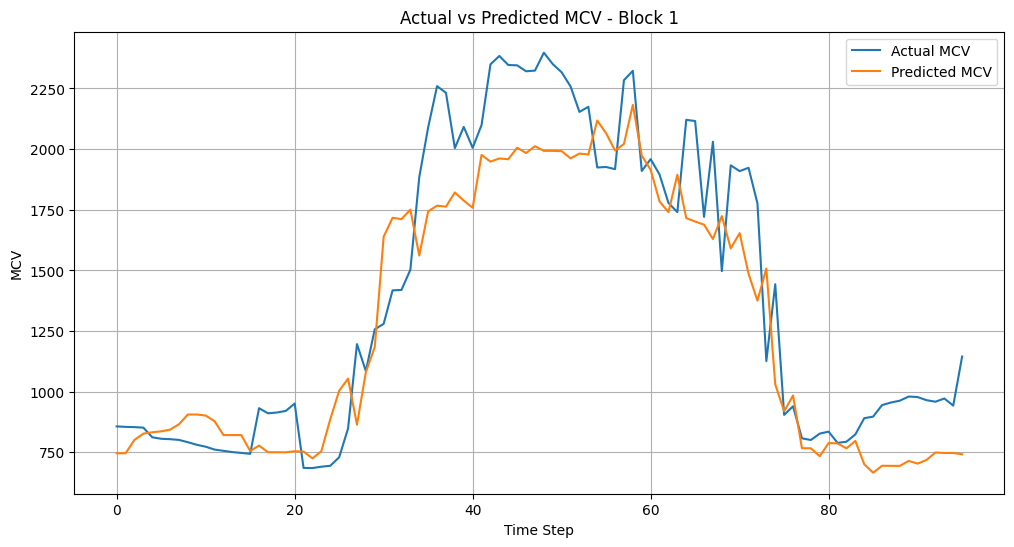

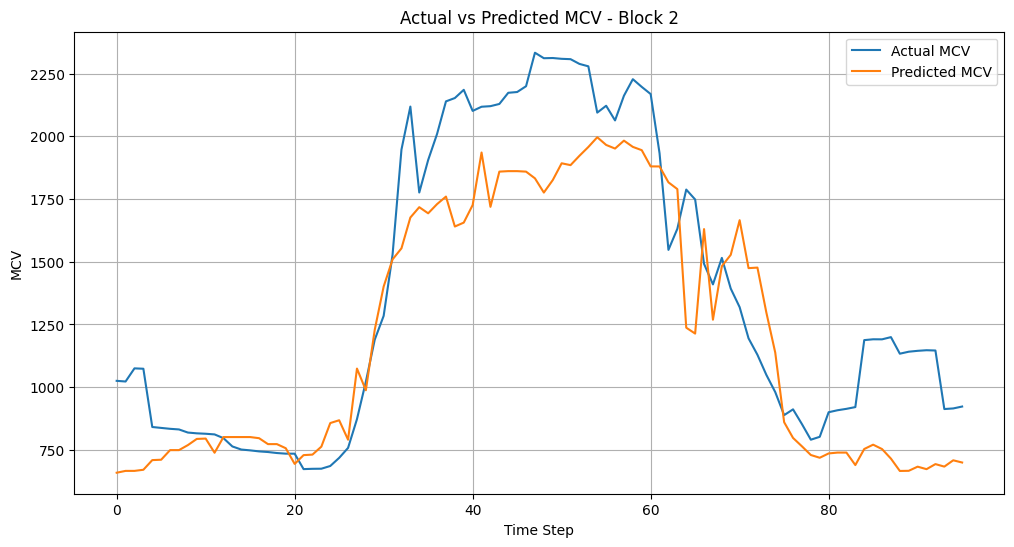

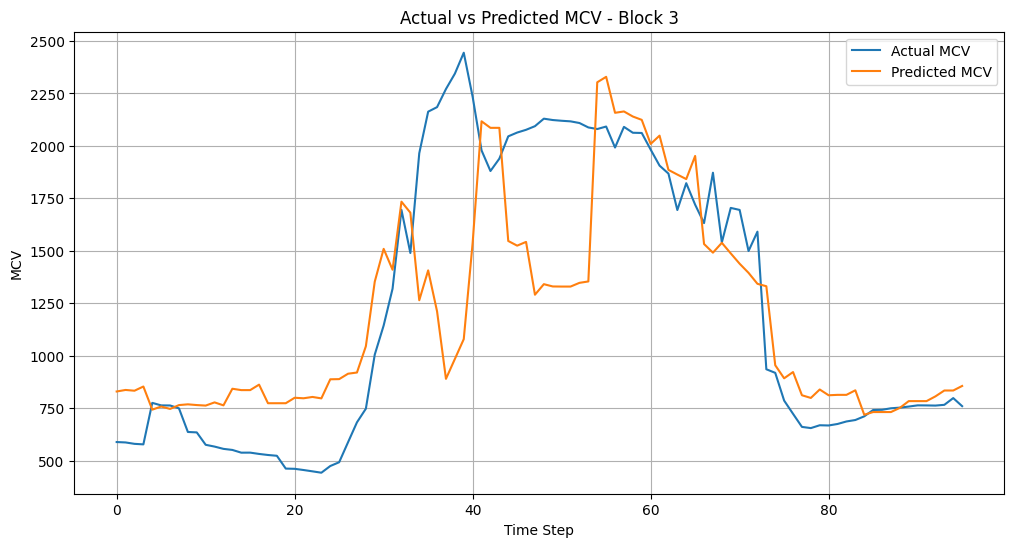

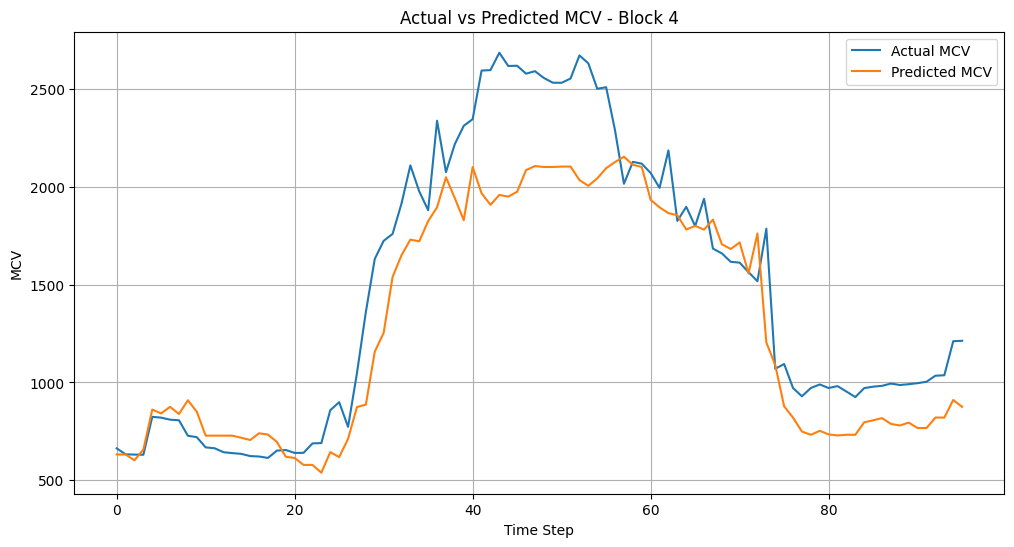

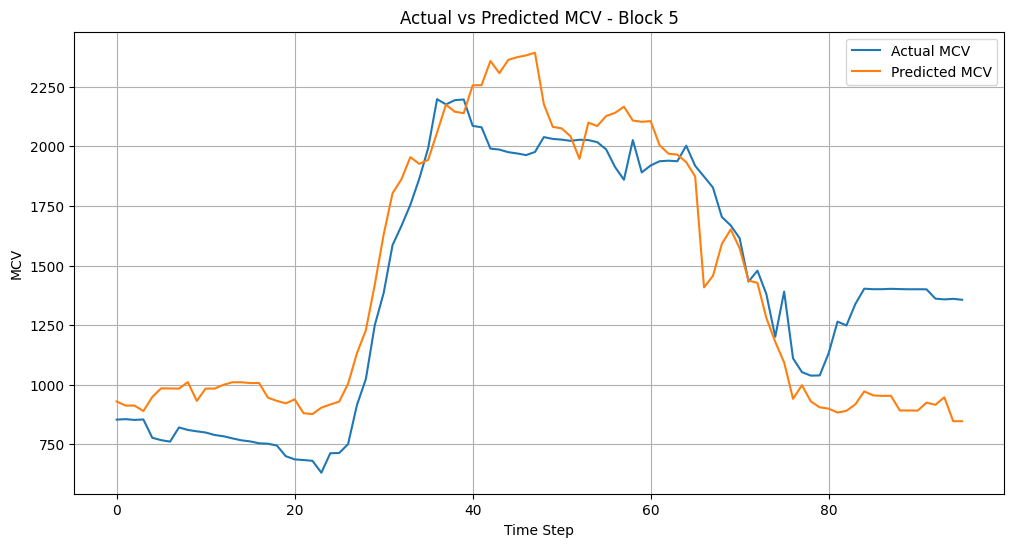

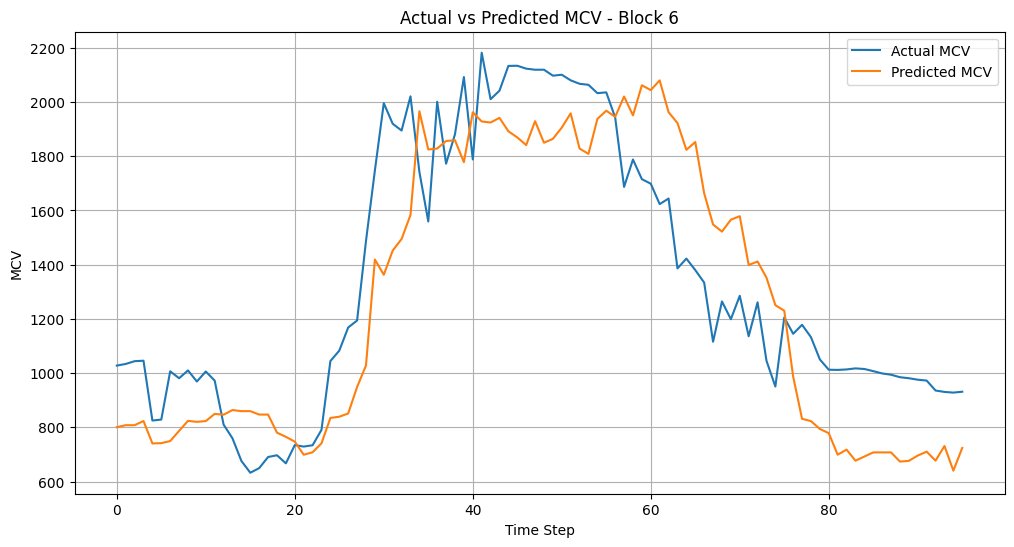

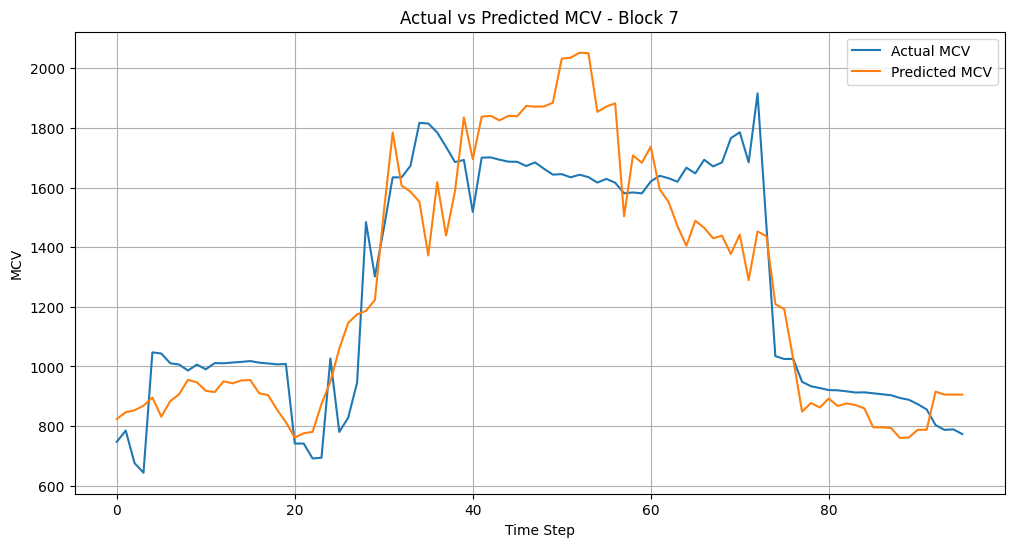

All predictions have been made and saved.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty list to hold all predictions
all_predictions = []

# Loop over the `last_week_data` DataFrame in blocks of 96 rows
block_size = 96
num_blocks = len(last_week_data) // block_size

for i in range(num_blocks):
    # Define the range for the current block
    start_idx = i * block_size
    end_idx = (i + 1) * block_size

    # Select the current block of data
    real_df = last_week_data.iloc[start_idx:end_idx]

    # Prepare the input data by dropping the target columns
    input_data = real_df.drop(['Next day MCP', 'Next Day MCV','Avg_Week_Hourly_MCP'], axis=1)

    # Make predictions for the current block
    predictions = model.predict(input_data)

    # Create a DataFrame for the predictions
    predictions_df = pd.DataFrame({'Predicted MCV (MW)': predictions})

    # Get the actual values for comparison
    actual_df = real_df['Next Day MCV']

    # Combine the actual and predicted values into a single DataFrame
    combined_df = pd.concat([actual_df.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)

    # Store the combined DataFrame (if you want to keep predictions for all blocks)
    all_predictions.append(combined_df)

    # Plotting the Actual vs Predicted MCP for the current block
    plt.figure(figsize=(12, 6))
    plt.plot(combined_df['Next Day MCV'], label='Actual MCV')
    plt.plot(combined_df['Predicted MCV (MW)'], label='Predicted MCV')
    plt.xlabel('Time Step')
    plt.ylabel('MCV')
    plt.title(f'Actual vs Predicted MCV - Block {i+1}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Combine all predictions into one DataFrame
final_predictions_df = pd.concat(all_predictions, ignore_index=True)

# Optionally, you can save the final predictions to a CSV
final_predictions_df.to_csv('all_predictions.csv', index=False)

print("All predictions have been made and saved.")
